<a href="https://colab.research.google.com/github/orhanaydinn/sign_language_Project/blob/main/Sign_Language_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Uploaded Dataset**

In [2]:
!pip install -q gdown
import gdown

file_id = "1L6PzZ8nM-7vN0myD7ra2Ve0y6FudYERz"
url = f"https://drive.google.com/uc?id={file_id}"
output = "SL_Numbers.zip"

gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1L6PzZ8nM-7vN0myD7ra2Ve0y6FudYERz
From (redirected): https://drive.google.com/uc?id=1L6PzZ8nM-7vN0myD7ra2Ve0y6FudYERz&confirm=t&uuid=af6ecd6d-f4ef-49a1-9ce8-c3c0ceec2585
To: /content/SL_Numbers.zip
100%|██████████| 908M/908M [00:05<00:00, 155MB/s]


'SL_Numbers.zip'

SL_Numbers.zip file upload with google drive link.
```
zip_path = "/content/brain_disease_classification_dataset.zip_v1"
extract_path = "/content/brain_disease_classification_dataset_v1"
```
**zip_path** represents the file path of the uploaded ZIP file.

**extract_path** defines the destination directory where the contents of the ZIP file will be extracted.

In [3]:
import zipfile
import os

# File and directory paths to extract
zip_path = "/content/SL_Numbers.zip"
extract_path = "/content/SL_Numbers_datasets"

# Open zip file and extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset successfully extracted to:", extract_path)


Dataset successfully extracted to: /content/SL_Numbers_datasets


## 1.1 - Check Check Main Dataset File

In [4]:
for root, dirs, files in os.walk(extract_path):
    print(f"\n{root}")
    for d in dirs:
        print(f"├── {d}")
    for f in files[:5]:
        print(f"├── {f}")


/content/SL_Numbers_datasets
├── SL_Numbers_merged
├── SL_Numbers_merged_aug
├── SL_Numbers
├── SL_Numbers_our

/content/SL_Numbers_datasets/SL_Numbers_merged
├── 0
├── 9
├── 3
├── 6
├── 7
├── 8
├── 2
├── 1
├── 4
├── 5

/content/SL_Numbers_datasets/SL_Numbers_merged/0
├── zero_355.jpg
├── zero_374.jpg
├── zero_1556.jpg
├── zero_449.jpg
├── zero_346.jpg

/content/SL_Numbers_datasets/SL_Numbers_merged/9
├── nine_1358.jpg
├── nine_1699.jpg
├── nine_1181.jpg
├── nine_453.jpg
├── nine_404.jpg

/content/SL_Numbers_datasets/SL_Numbers_merged/3
├── three_176.jpg
├── three_157.jpg
├── three_178.jpg
├── three_374.jpg
├── three_970.jpg

/content/SL_Numbers_datasets/SL_Numbers_merged/6
├── six_288.jpg
├── six_1406.jpg
├── six_1421.jpg
├── six_124.jpg
├── six_1148.jpg

/content/SL_Numbers_datasets/SL_Numbers_merged/7
├── seven_640.jpg
├── seven_1371.jpg
├── seven_891.jpg
├── seven_1706.jpg
├── seven_585.jpg

/content/SL_Numbers_datasets/SL_Numbers_merged/8
├── eight_458.jpg
├── eight_271.jpg
├── e

## 1.2 - Check Images for All Classes

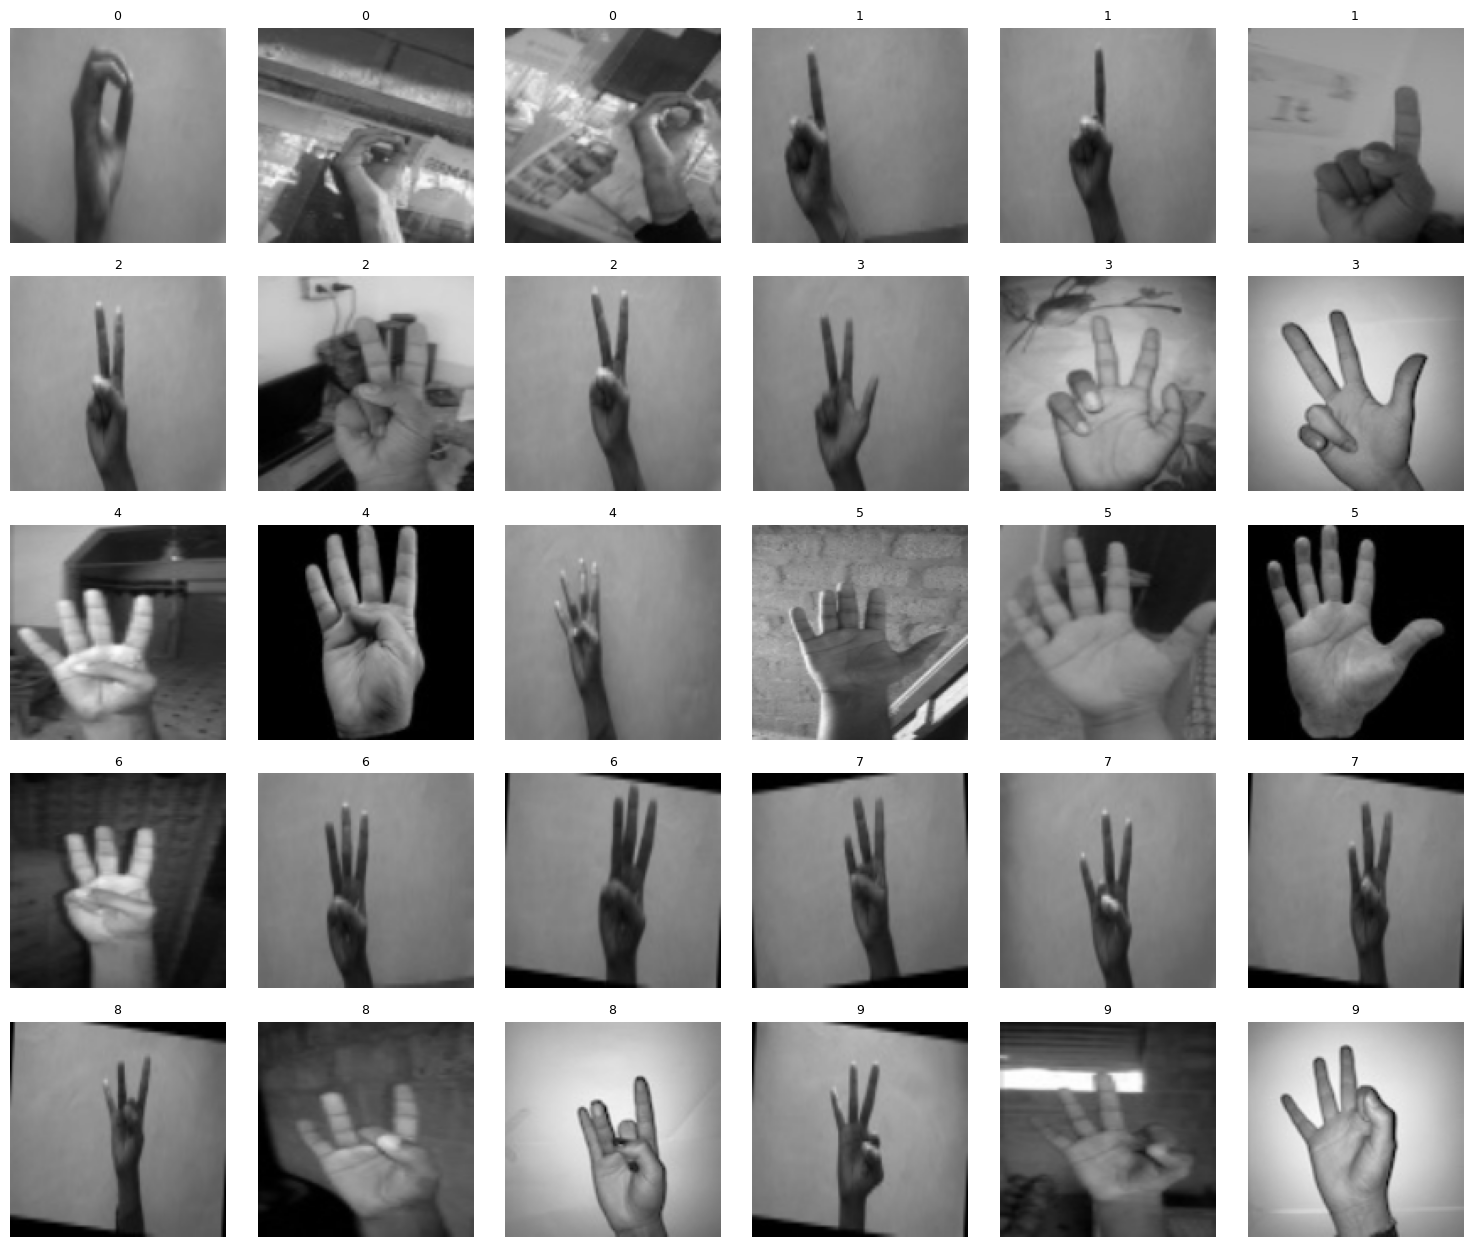

In [5]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers", samples=3)


## 1.3 - Check Main Dataset Count

   Class  Image Count
0   zero         1500
1    one         1500
2    two         1500
3  three         1500
4   four         1500
5   five         1500
6    six         1500
7  seven         1500
8  eight         1500
9   nine         1500

Total Image: 15000


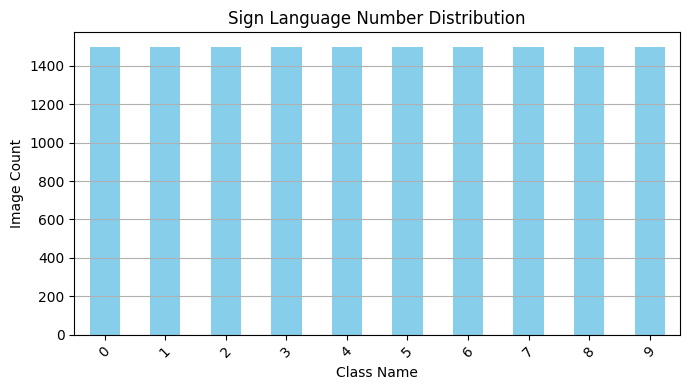

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

df_counts.plot(kind="bar", figsize=(7, 4), legend=False, color="skyblue")
plt.title("Sign Language Number Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Name")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **2 - Sign Language Data Preparation & Preprocessing**

## 2.1 - Add Our Dataset

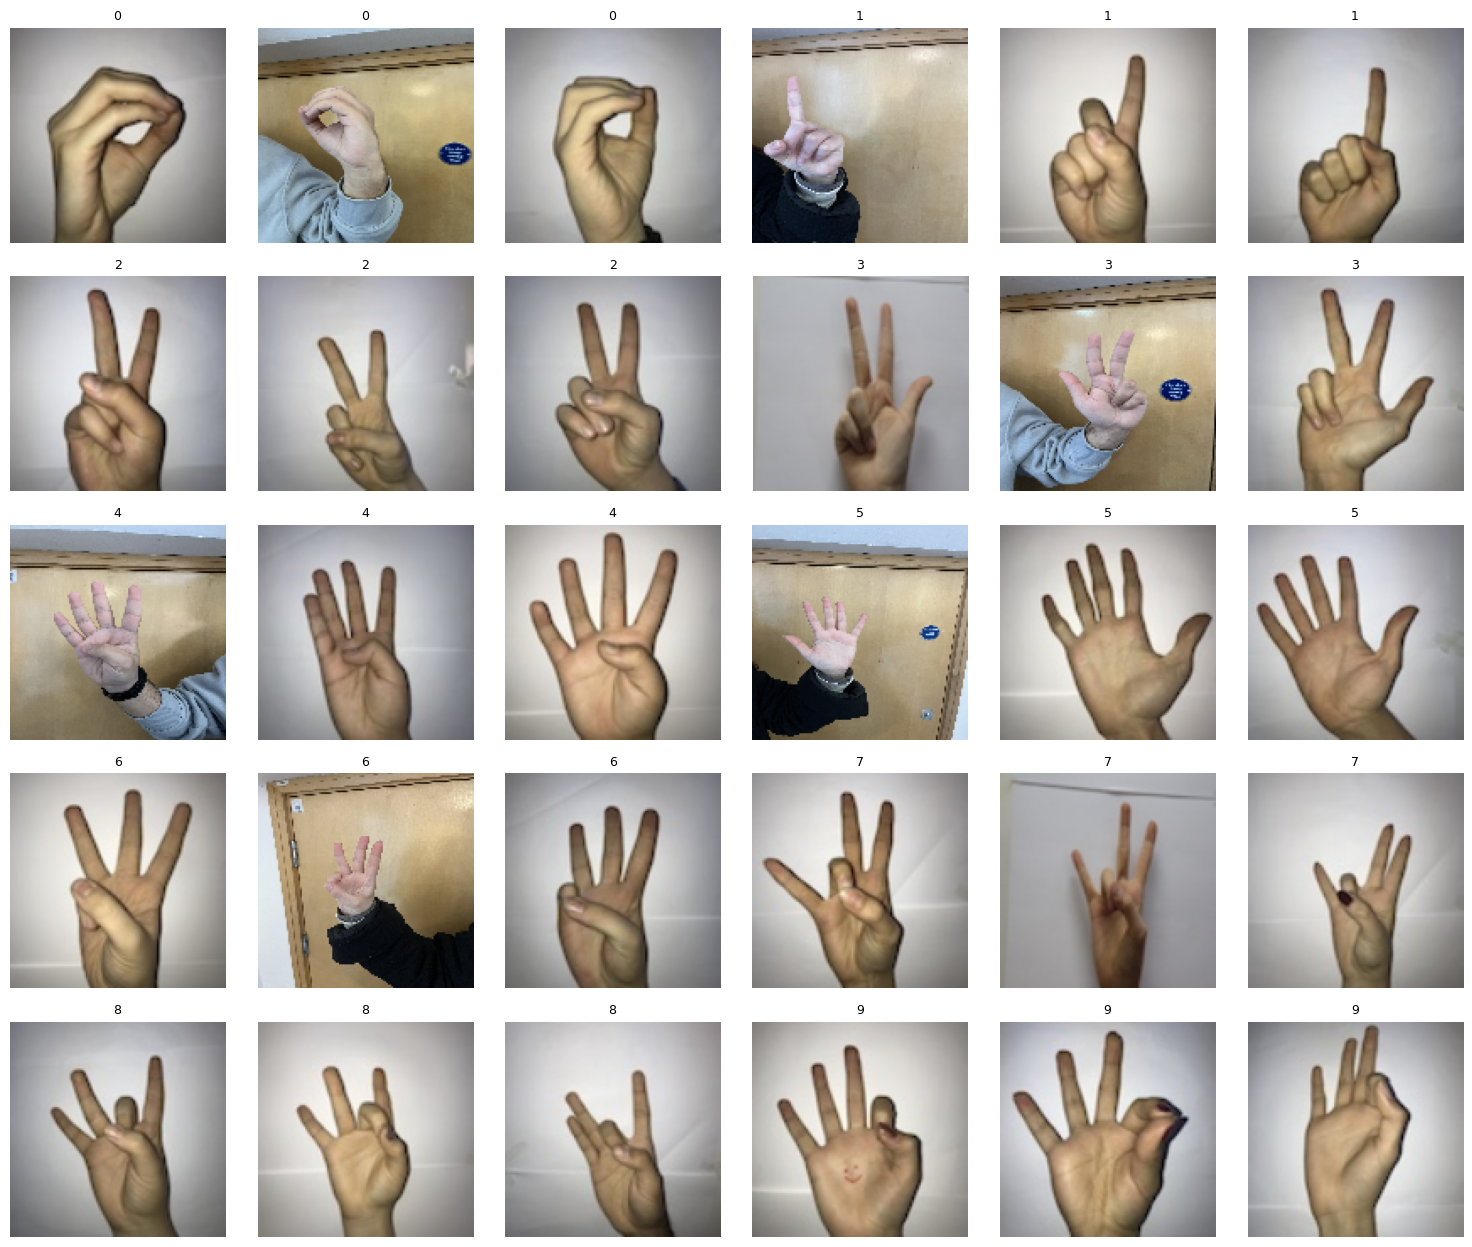

In [11]:
import os
import cv2
import random
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_random_images(dataset_dir, samples=3):

    inner_dir = '/content/SL_Numbers_datasets/SL_Numbers_our'

    class_folders = [f for f in os.listdir(inner_dir) if os.path.isdir(os.path.join(inner_dir, f))]

    rows = len(class_folders)
    cols = 6
    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(inner_dir, label)
        images = os.listdir(class_path)
        random.shuffle(images)

        for img_name in images[:samples]:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=9)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_random_images("/content/SL_Numbers_datasets/SL_Numbers_our", samples=3)


## 2.2 - Check Our Dataset Count

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_our"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")



   Class  Image Count
0   zero          251
1    one          251
2    two          251
3  three          251
4   four          251
5   five          251
6    six          251
7  seven          251
9   nine          251
8  eight          248

Total Image: 2507


## 2.3 - Merge Main and Our Dataset

In [20]:
import os
import shutil
import cv2
import re

original_dataset = "/content/SL_Numbers_datasets/SL_Numbers"
our_dataset_name = "/content/SL_Numbers_datasets/SL_Numbers_our"
merged_dataset = "SL_Numbers_merged"
img_size = 64

label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

# Klasör temizleme/kopyalama
if os.path.exists(merged_dataset):
    shutil.rmtree(merged_dataset)
shutil.copytree(original_dataset, merged_dataset)
print("Original dataset copied to SL_Numbers_merged")

# Her sınıfı işle
for raw_label in os.listdir(our_dataset_name):
    if raw_label not in label_map:
        print(f"Unknown label: {raw_label}")
        continue

    label_name = label_map[raw_label]
    source_folder = os.path.join(our_dataset_name, raw_label)
    target_folder = os.path.join(merged_dataset, raw_label)

    if not os.path.exists(target_folder):
        print(f"Target folder does not exist: {target_folder}")
        continue


    max_index = 0
    for fname in os.listdir(target_folder):
        match = re.match(f"{label_name}_(\d+)", fname)
        if match:
            max_index = max(max_index, int(match.group(1)))

    added_count = 0
    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)
        if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (img_size, img_size))

        new_index = max_index + 1
        new_filename = f"{label_name}_{new_index}.jpg"
        save_path = os.path.join(target_folder, new_filename)
        cv2.imwrite(save_path, resized)
        max_index = new_index
        added_count += 1

    print(f"Finished processing class: {raw_label} - {added_count} image(s) added ")


Original dataset copied to SL_Numbers_merged
Finished processing class: 0 - 251 image(s) added 
Finished processing class: 9 - 251 image(s) added 
Finished processing class: 3 - 251 image(s) added 
Finished processing class: 6 - 251 image(s) added 
Finished processing class: 7 - 251 image(s) added 
Finished processing class: 8 - 248 image(s) added 
Finished processing class: 2 - 251 image(s) added 
Finished processing class: 1 - 251 image(s) added 
Finished processing class: 4 - 251 image(s) added 
Finished processing class: 5 - 251 image(s) added 


## 2.4 - Check Current**(SL_Numbers_merged)** Dataset

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = "/content/SL_Numbers_merged"


label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def count_images_in_folders(base_dir):
    class_counts = {}
    for class_name in sorted(os.listdir(base_dir)):
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            readable_name = label_map.get(class_name, class_name)
            class_counts[readable_name] = len(image_files)
    return class_counts

class_counts = count_images_in_folders(base_dir)

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
df = df.sort_values("Image Count", ascending=False)


total = df["Image Count"].sum()
print(df)
print(f"\nTotal Image: {total}")

   Class  Image Count
0   zero         1751
1    one         1751
2    two         1751
3  three         1751
4   four         1751
5   five         1751
6    six         1751
7  seven         1751
9   nine         1751
8  eight         1748

Total Image: 17507


## 2.5 - Data Augmentation

In [52]:
import os
import cv2

source_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged"
target_dir = "/content/SL_Numbers_merged_aug"
img_size = 64

# Label → filename prefix map
label_map = {
    "0": "zero", "1": "one", "2": "two", "3": "three", "4": "four",
    "5": "five", "6": "six", "7": "seven", "8": "eight", "9": "nine"
}

def rotate(img, angle):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h), borderMode=cv2.BORDER_REPLICATE)

total_augmented = 0


for label in os.listdir(source_dir):
    src_folder = os.path.join(source_dir, label)
    dst_folder = os.path.join(target_dir, label)
    os.makedirs(dst_folder, exist_ok=True)

    label_prefix = label_map.get(label, label)

    class_augmented = 0

    for fname in os.listdir(src_folder):
        if not fname.lower().endswith(".jpg"):
            continue

        fpath = os.path.join(src_folder, fname)
        img = cv2.imread(fpath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to read: {fname}")
            continue

        base_name = fname.split(".")[0]

        for i in range(1, 6):  # For Left
            angle = i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_L_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

        for i in range(1, 6):  # For Right
            angle = -i * 5
            rotated = rotate(img, angle)
            save_name = f"{base_name}_R_{i}.jpg"
            save_path = os.path.join(dst_folder, save_name)
            cv2.imwrite(save_path, rotated)
            class_augmented += 1
            total_augmented += 1

    print(f" Finished processing class: {label} - {class_augmented} image added")

print(f"\nTotal Image: {total_augmented}")


 Finished processing class: 0 - 17510 image added
 Finished processing class: 9 - 17510 image added
 Finished processing class: 3 - 17510 image added
 Finished processing class: 6 - 17510 image added
 Finished processing class: 7 - 17510 image added
 Finished processing class: 8 - 17480 image added
 Finished processing class: 2 - 17510 image added
 Finished processing class: 1 - 17510 image added
 Finished processing class: 4 - 17510 image added
 Finished processing class: 5 - 17510 image added

Total Image: 175070


## 2.6 - Check Data Augmentation Image

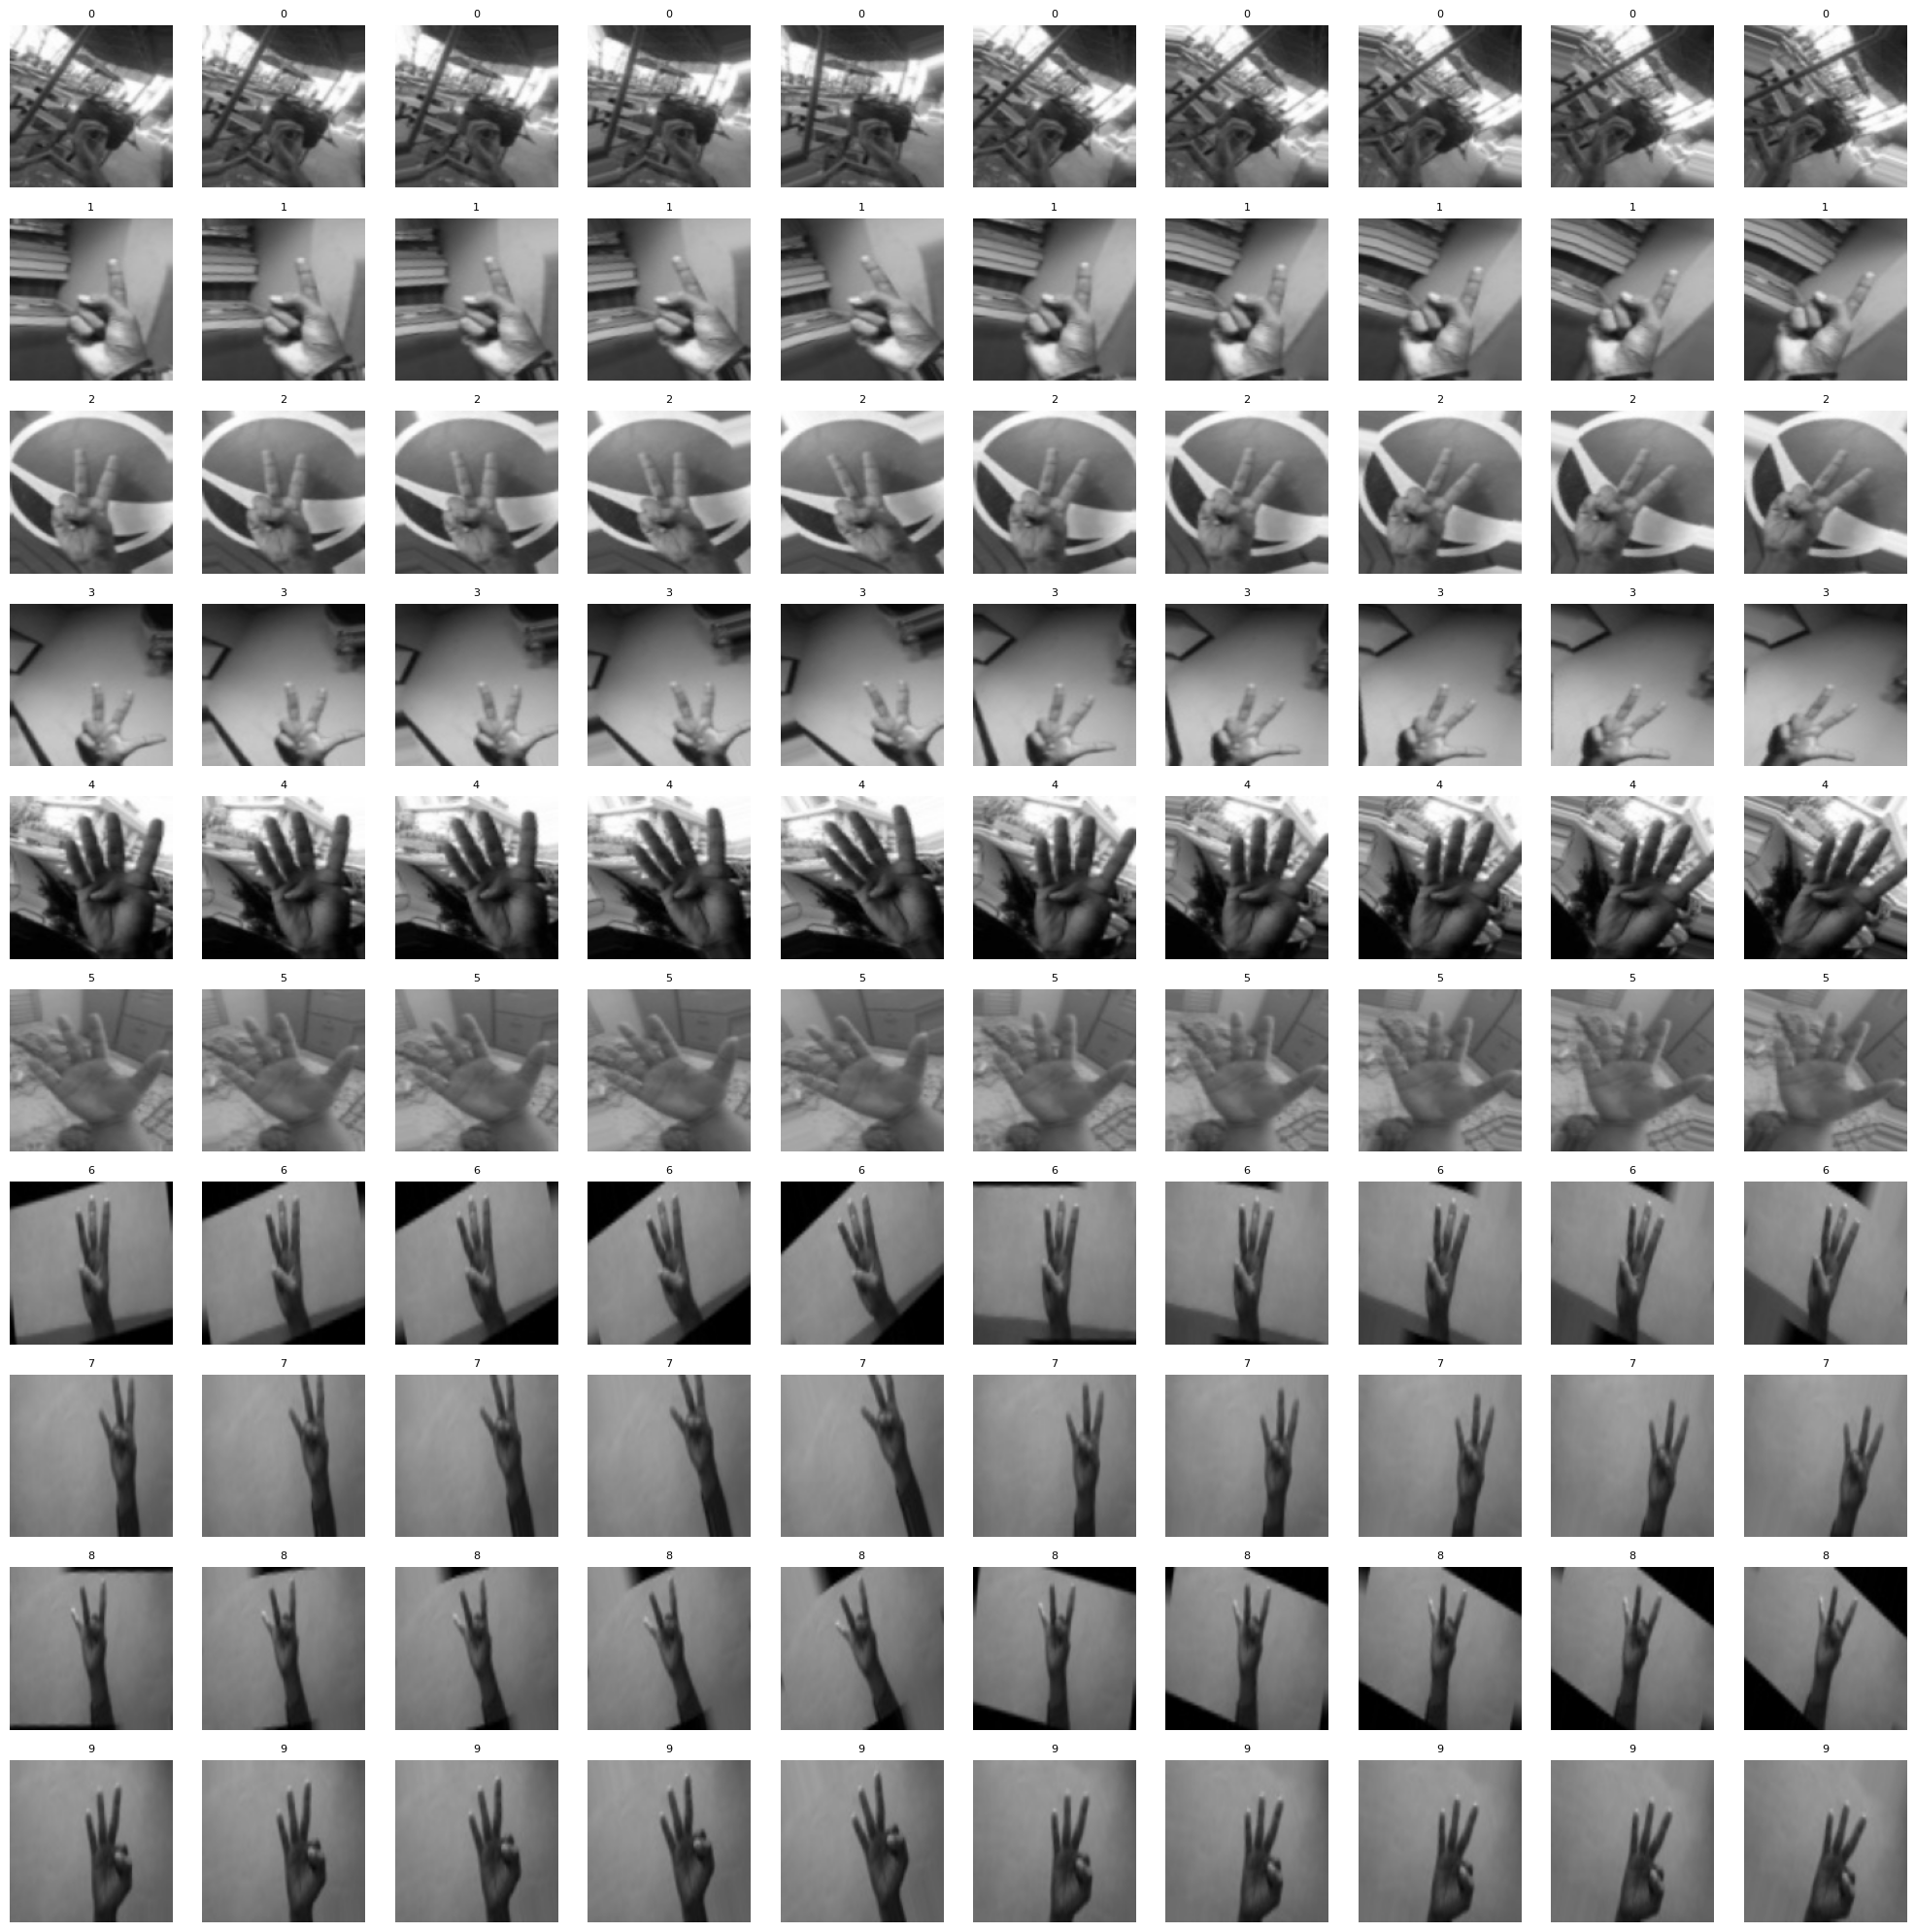

In [55]:
import os
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 128

def show_first_images(dataset_dir, samples=10):
    class_folders = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

    rows = len(class_folders)
    cols = samples
    plt.figure(figsize=(cols * 2, rows * 2))
    i = 1

    for label in sorted(class_folders):
        class_path = os.path.join(dataset_dir, label)
        images = sorted(os.listdir(class_path))[:samples]

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            plt.subplot(rows, cols, i)
            plt.imshow(img)
            plt.title(label, fontsize=8)
            plt.axis('off')
            i += 1

    plt.tight_layout()
    plt.show()


show_first_images("/content/SL_Numbers_datasets/SL_Numbers_merged_aug", samples=10)

## 2.7 - Image Path and Label List

In [62]:
import os
import random

base_dir = "/content/SL_Numbers_datasets/SL_Numbers_merged_aug"
image_label_list = []

# Her sınıftan bir örnek için dictionary
sample_per_class = {}

for label in sorted(os.listdir(base_dir)):
    class_dir = os.path.join(base_dir, label)
    if not os.path.isdir(class_dir):
        continue
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        image_label_list.append((img_path, int(label)))  # label: 0-9


    if images:
        random_img = random.choice(images)
        random_img_path = os.path.join(class_dir, random_img)
        sample_per_class[label] = random_img_path


print(f"Total Image: {len(image_label_list)}")

for label, img_path in sample_per_class.items():
    print(f"Class {label}: {img_path}")

Total Image: 175070
Class 0: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/0/zero_347_R_2.jpg
Class 1: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/1/one_1088_L_1.jpg
Class 2: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/2/two_144_L_2.jpg
Class 3: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/3/three_1634_L_3.jpg
Class 4: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/4/four_28_L_1.jpg
Class 5: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/5/five_1726_L_3.jpg
Class 6: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/6/six_1201_R_2.jpg
Class 7: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/7/seven_1549_L_4.jpg
Class 8: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/8/eight_144_L_4.jpg
Class 9: /content/SL_Numbers_datasets/SL_Numbers_merged_aug/9/nine_1347_L_3.jpg


# **3 - Model Training & Evaluation**

## 3.1 - Train / Validation Split & DataLoader Preparation

In [69]:
from torch.utils.data import Dataset
from PIL import Image

class SignLanguageDataset(Dataset):
    def __init__(self, image_label_list, transform=None):
        self.data = image_label_list  # Liste: (path, label)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("L")  # Grayscale (tek kanal)

        if self.transform:
            image = self.transform(image)

        return image, label

In [70]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader

train_list, val_list = train_test_split(
    image_label_list,
    test_size=0.2,
    stratify=[label for _, label in image_label_list],
    random_state=42
)

In [71]:
print(f"Train set: {len(train_list)} images")
print(f"Validation set: {len(val_list)} images")


Train set: 140056 images
Validation set: 35014 images


In [73]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [75]:
val_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [79]:
train_dataset = SignLanguageDataset(train_list, transform=train_transforms)
val_dataset   = SignLanguageDataset(val_list, transform=val_transforms)

In [81]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

## 3.2 -CNN - Model Architectire

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SignLanguageCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = self.pool(F.relu(self.conv3(x)))  # 16x16 → 8x8
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [87]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn = SignLanguageCNN(num_classes=10).to(device)
print(model_cnn)

SignLanguageCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time


num_epochs = 30
patience = 5
best_val_loss = np.inf
early_stop_counter = 0
save_path = "best_model_cnn.pt"


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


total_start = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()

    model_cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    model_cnn.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_cnn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)


    epoch_time = time.time() - epoch_start


    print(f"Epoch {epoch+1}/{num_epochs} | {epoch_time:.2f}s")
    print(f"  Train Loss: {avg_train_loss:.4f} | Acc: {train_accuracy:.2f}%")
    print(f"  Val   Loss: {avg_val_loss:.4f} | Acc: {val_accuracy:.2f}%")



    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stop_counter = 0
        torch.save(model_cnn.state_dict(), save_path)
        print("Best model was saved. (checkpoint)")
    else:
        early_stop_counter += 1
        print(f"val_accuracy did not improve ({early_stop_counter}/{patience})")

        if early_stop_counter >= patience:
            print("early stopping")
            break

total_time = time.time() - total_start
minutes = int(total_time // 60)
seconds = int(total_time % 60)
print(f"Training time: {int(minutes)} minutes {int(seconds)} seconds")

Epoch 1/30 | 51.93s
  Train Loss: 0.1204 | Acc: 96.10%
  Val   Loss: 0.0733 | Acc: 97.64%
Best model was saved. (checkpoint)
Epoch 2/30 | 51.73s
  Train Loss: 0.0564 | Acc: 98.17%
  Val   Loss: 0.0572 | Acc: 98.14%
Best model was saved. (checkpoint)
Epoch 3/30 | 51.55s
  Train Loss: 0.0374 | Acc: 98.78%
  Val   Loss: 0.0407 | Acc: 98.74%
Best model was saved. (checkpoint)
Epoch 4/30 | 51.05s
  Train Loss: 0.0286 | Acc: 99.11%
  Val   Loss: 0.0385 | Acc: 98.87%
Best model was saved. (checkpoint)
Epoch 5/30 | 50.82s
  Train Loss: 0.0234 | Acc: 99.28%
  Val   Loss: 0.0445 | Acc: 98.69%
val_accuracy did not improve (1/5)
Epoch 6/30 | 51.19s
  Train Loss: 0.0204 | Acc: 99.38%
  Val   Loss: 0.0669 | Acc: 98.43%
val_accuracy did not improve (2/5)
Epoch 7/30 | 50.84s
  Train Loss: 0.0184 | Acc: 99.44%
  Val   Loss: 0.0462 | Acc: 98.77%
val_accuracy did not improve (3/5)
Epoch 8/30 | 51.77s
  Train Loss: 0.0165 | Acc: 99.51%
  Val   Loss: 0.0382 | Acc: 99.05%
Best model was saved. (checkpoint)


### 3.4 - CNN Model Training Visualization

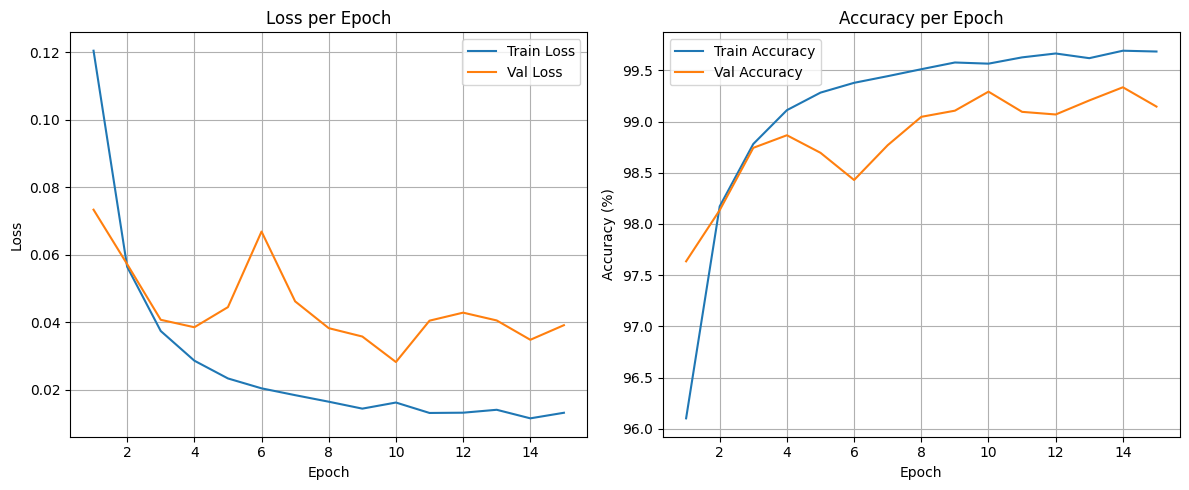

In [90]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_losses) + 1)

# Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, val_accuracies, label="Val Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.5 - Confusion Matrix & Model Evaluation

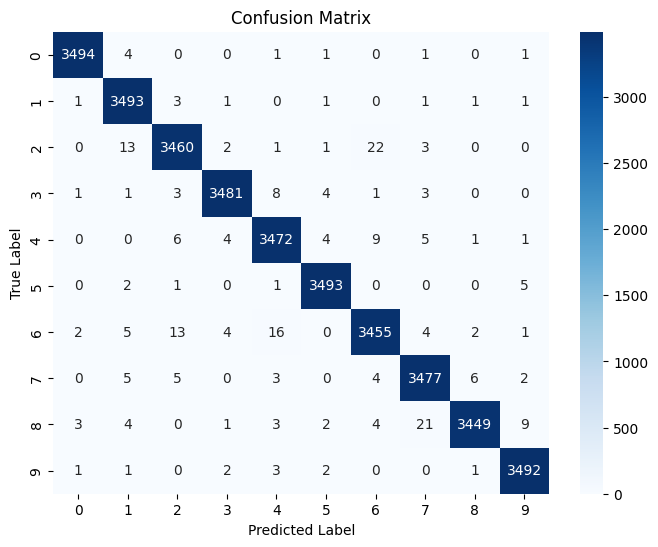

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch


model_cnn.load_state_dict(torch.load("best_model_cnn.pt"))
model_cnn.eval()


all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model_cnn(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
labels = [str(i) for i in range(10)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [112]:
import cv2
import numpy as np
import base64
from IPython.display import display, Javascript
from google.colab.output import eval_js
from PIL import Image as PilImage
from torchvision import transforms
import torch
from google.colab.patches import cv2_imshow

# 🔄 Tahmin döngüsü için fotoğraf çekme widget'ı
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript("""
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '📸 Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    """)
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename


📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

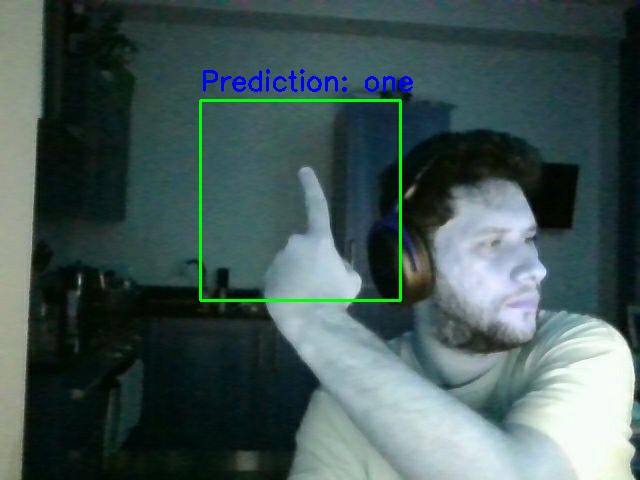

📌 Tahmin edilen sınıf: one

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

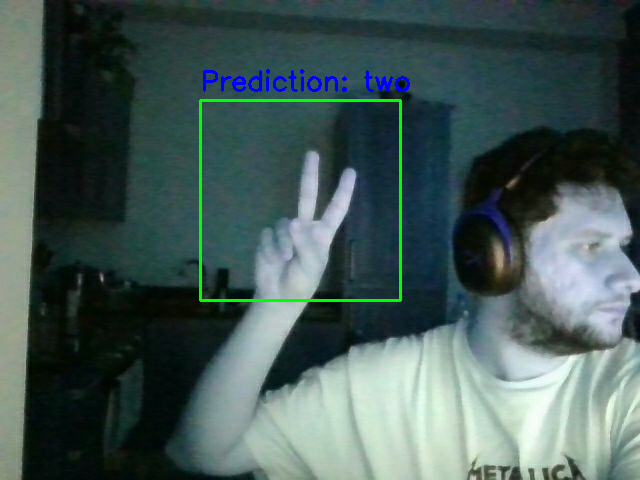

📌 Tahmin edilen sınıf: two

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

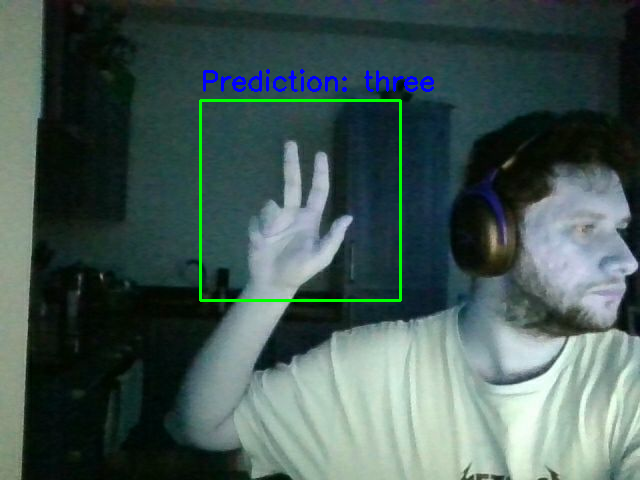

📌 Tahmin edilen sınıf: three

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

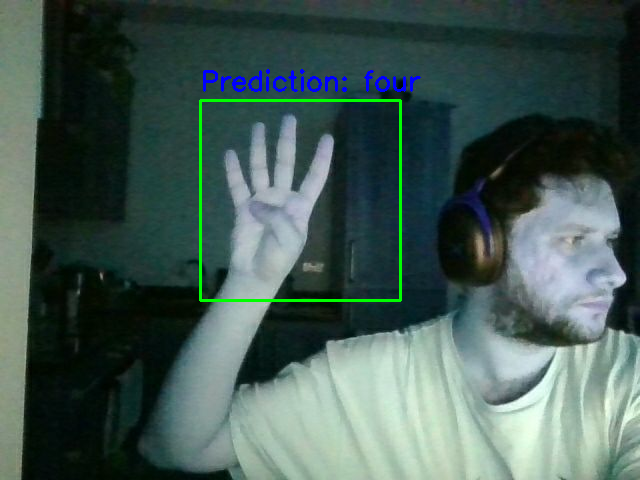

📌 Tahmin edilen sınıf: four

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

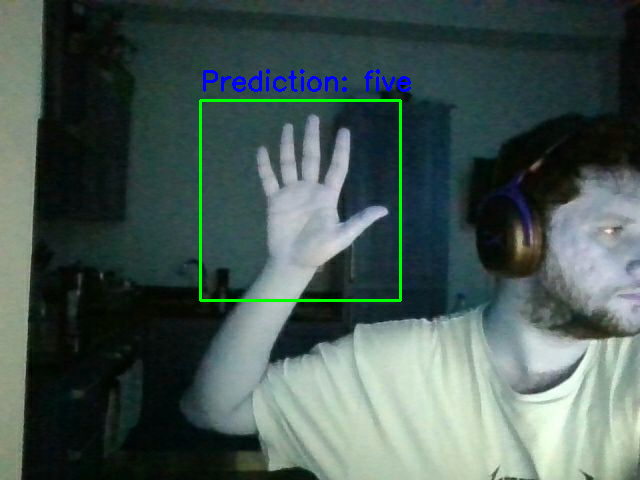

📌 Tahmin edilen sınıf: five

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

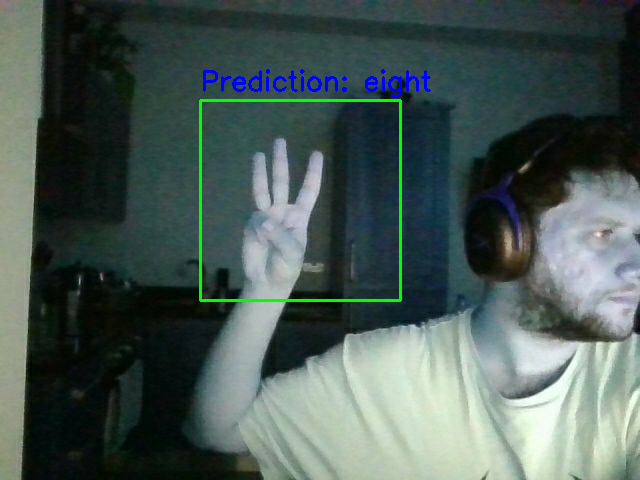

📌 Tahmin edilen sınıf: eight

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

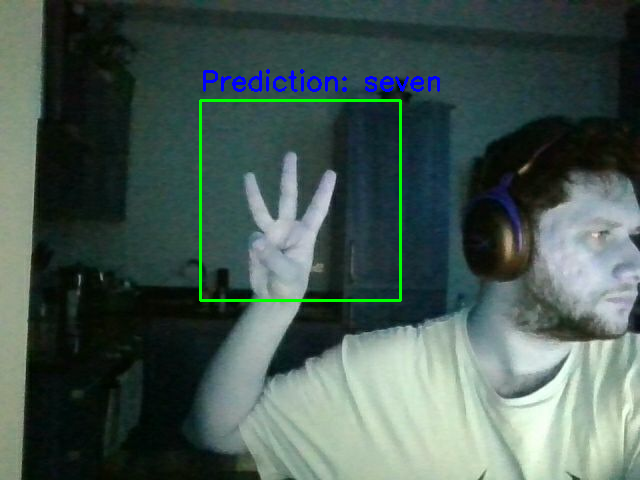

📌 Tahmin edilen sınıf: seven

Yeni tahmin için Enter'a bas, çıkmak için 'q' yaz: 
📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...


<IPython.core.display.Javascript object>

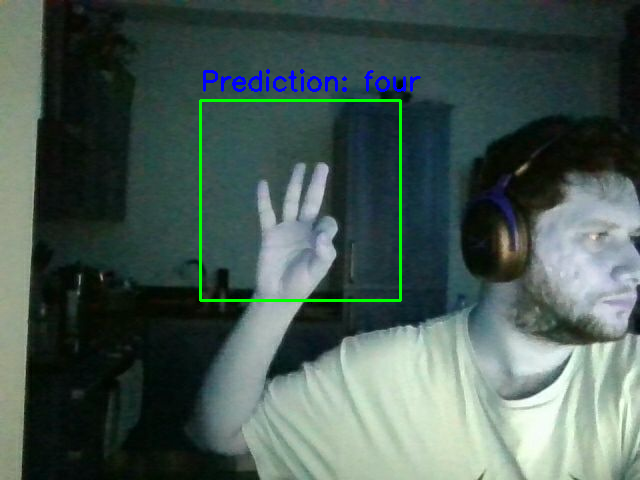

📌 Tahmin edilen sınıf: four


KeyboardInterrupt: Interrupted by user

In [115]:
# 🧠 Tahmin yapacak sınıf isimleri (0–9 arası gesture'lar)
label_map = {
    0: "zero", 1: "one", 2: "two", 3: "three", 4: "four",
    5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"
}

# 🎯 Model eval modda
model_cnn.eval()

while True:
    print("📸 Elinizi kutuya getirin ve fotoğraf çekmek için butona basın...")
    image_path = take_photo()

    # 📂 Görseli oku ve ROI bölgesi çıkar
    frame = cv2.imread(image_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 🟩 Sabit ROI alanı
    x, y, w, h = 200, 100, 200, 200
    roi = frame_rgb[y:y+h, x:x+w]

    # 🖤 Preprocess
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray_roi, (64, 64))
    normalized = (resized / 255.0 - 0.5) / 0.5
    tensor_img = torch.tensor(normalized).unsqueeze(0).unsqueeze(0).float().to(device)

    # 🔮 Tahmin
    with torch.no_grad():
        output = model_cnn(tensor_img)
        _, predicted = torch.max(output, 1)
        predicted_label = predicted.item()
        predicted_text = label_map[predicted_label]

    # ✍️ Kutunun üzerine tahmini yaz
    frame_display = frame_rgb.copy()
    cv2.rectangle(frame_display, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame_display, f"Prediction: {predicted_text}", (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # 🖼️ Göster
    cv2_imshow(frame_display)
    print(f"📌 Tahmin edilen sınıf: {predicted_text}")

    # 🔁 Devam kararı
    cont = input("\nYeni tahmin için Enter'a bas, çıkmak için 'q' yaz: ")
    if cont.strip().lower() == 'q':
        print("🚪 Tahmin döngüsünden çıkılıyor...")
        break
